<a href="https://colab.research.google.com/github/syuusei3/coder/blob/master/12302300_signate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.ファイル読み込み

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
train = pd.read_csv('/content/drive/MyDrive/SMFG/train.csv', index_col=0) # 学習用データ
test = pd.read_csv('/content/drive/MyDrive/SMFG/test.csv', index_col=0) # 評価用データ
sample_submit = pd.read_csv('/content/drive/MyDrive/SMFG/sample_submission.csv', index_col=0, header=None) # 応募用サンプルファイル

# 2.水増し


In [5]:
import pandas as pd
from sklearn.utils import resample

# データの読み込み
# train = pd.read_csv('your_dataset.csv')

# 'health' の値に基づいてデータセットを分割
train_0 = train[train['health'] == 0]
train_1 = train[train['health'] == 1]
train_2 = train[train['health'] == 2]

# 各クラスを最大クラスサイズに合わせてオーバーサンプリング
max_size = len(train_1)  # 最大のクラスサイズ
train_0_upsampled = resample(train_0, replace=True, n_samples=max_size, random_state=123)
train_2_upsampled = resample(train_2, replace=True, n_samples=max_size, random_state=123)

# アップサンプリングされたデータセットと元のデータセットを統合
train_upsampled = pd.concat([train_1, train_0_upsampled, train_2_upsampled])

# 統合後のデータセットの 'health' の値の分布を確認
print("アップサンプリング後の 'health' の値の分布:")
print(train_upsampled['health'].value_counts())

# 元の 'train' データセットに更新されたデータを反映
train = train_upsampled


アップサンプリング後の 'health' の値の分布:
1    15751
0    15751
2    15751
Name: health, dtype: int64


In [6]:
# 'health' カラムの値の分布数を確認
health_distribution = train['health'].value_counts()
print(health_distribution)


1    15751
0    15751
2    15751
Name: health, dtype: int64


#3. データの確認

In [7]:
train.head()

,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,spc_common,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,English oak,...,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,crimson king maple,...,BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
4,2016-06-24,23,OnCurb,1,NaN,NaN,NoDamage,Volunteer,Stones,London planetree,...,MN03,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9
5,2015-08-11,12,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,Amur cork tree,...,QN22,Flushing,4,4088901,Queens,Flushing,407,11,40,20
6,2015-10-24,8,OnCurb,1,NaN,Helpful,Damage,Volunteer,BranchLights,littleleaf linden,...,QN22,Flushing,4,4086500,Queens,Flushing,407,16,40,20


In [8]:
train['health'].value_counts()

1    15751
0    15751
2    15751
Name: health, dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47253 entries, 0 to 9093
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  47253 non-null  object
 1   tree_dbh    47253 non-null  int64 
 2   curb_loc    47253 non-null  object
 3   health      47253 non-null  int64 
 4   steward     11357 non-null  object
 5   guards      12596 non-null  object
 6   sidewalk    47253 non-null  object
 7   user_type   47253 non-null  object
 8   problems    18880 non-null  object
 9   spc_common  47253 non-null  object
 10  spc_latin   47253 non-null  object
 11  nta         47253 non-null  object
 12  nta_name    47253 non-null  object
 13  borocode    47253 non-null  int64 
 14  boro_ct     47253 non-null  int64 
 15  boroname    47253 non-null  object
 16  zip_city    47253 non-null  object
 17  cb_num      47253 non-null  int64 
 18  st_senate   47253 non-null  int64 
 19  st_assem    47253 non-null  int64 
 20  cncldis

In [10]:
train['health'].value_counts()

1    15751
0    15751
2    15751
Name: health, dtype: int64

In [11]:
# train と test データセットの列名を表示
print("Columns in train dataset:", train.columns)
print("Columns in test dataset:", test.columns)

Columns in train dataset: Index(['created_at', 'tree_dbh', 'curb_loc', 'health', 'steward', 'guards',
       'sidewalk', 'user_type', 'problems', 'spc_common', 'spc_latin', 'nta',
       'nta_name', 'borocode', 'boro_ct', 'boroname', 'zip_city', 'cb_num',
       'st_senate', 'st_assem', 'cncldist'],
      dtype='object')
Columns in test dataset: Index(['created_at', 'tree_dbh', 'curb_loc', 'steward', 'guards', 'sidewalk',
       'user_type', 'problems', 'spc_common', 'spc_latin', 'nta', 'nta_name',
       'borocode', 'boro_ct', 'boroname', 'zip_city', 'cb_num', 'st_senate',
       'st_assem', 'cncldist'],
      dtype='object')


In [12]:
# 'curb_loc' 列のユニークな値を train データセットで取得
unique_values_train = train['curb_loc'].unique()

# ユニークな値の表示
print("Unique values in 'curb_loc' in the train dataset:", unique_values_train)

Unique values in 'curb_loc' in the train dataset: ['OnCurb' 'OffsetFromCurb']


In [13]:
# 'spc_common' 列のユニークな値を train データセットで取得
unique_values_train = train['spc_common'].unique()

# ユニークな値の表示
print("Unique values in 'spc_common' in the train dataset:", unique_values_train)

Unique values in 'spc_common' in the train dataset: ['English oak' 'crimson king maple' 'London planetree' 'Amur cork tree'
 'littleleaf linden' 'Siberian elm' 'Norway maple' 'green ash' 'cherry'
 'American elm' 'Kentucky coffeetree' 'Amur maackia' 'Japanese zelkova'
 'silver linden' "Schumard's oak" 'pin oak' 'American hornbeam'
 'silver maple' 'ginkgo' 'Callery pear' 'Turkish hazelnut' 'Amur maple'
 'American linden' 'catalpa' 'Sophora' 'maple' 'American hophornbeam'
 'bur oak' 'cockspur hawthorn' 'honeylocust' 'Japanese tree lilac'
 'sawtooth oak' 'willow oak' 'black oak' 'eastern redbud' 'sweetgum'
 'purple-leaf plum' 'Chinese elm' 'dawn redwood' 'American beech'
 'red maple' 'swamp white oak' 'holly' "'Schubert' chokecherry" 'ash'
 'Ohio buckeye' 'Cornelian cherry' 'black walnut' 'crab apple'
 'Chinese fringetree' 'hawthorn' 'silver birch' 'katsura tree'
 'black locust' 'hedge maple' 'Persian ironwood' 'Norway spruce'
 'eastern redcedar' 'blue spruce' 'white ash' 'Atlantic white c

In [14]:
# 'spc_common' 列の欠損値の数をカウント
missing_values = train['spc_common'].isnull().sum()

# 欠損値の数を表示
print("Number of missing values in 'spc_common' in the train dataset:", missing_values)


Number of missing values in 'spc_common' in the train dataset: 0


#3.データの確認、guardsの確認


In [15]:
# 'guards' 列のユニークな値を取得
unique_values_guards = train['guards'].unique()

# ユニークな値の表示
print("Unique values in 'guards':", unique_values_guards)


Unique values in 'guards': [nan 'Helpful' 'Harmful' 'Unsure']


In [16]:
# 'guards' 列のユニークな値を取得
unique_values_guards = test['guards'].unique()

# ユニークな値の表示
print("Unique values in 'guards':", unique_values_guards)

Unique values in 'guards': [nan 'Unsure' 'Helpful' 'Harmful']


In [17]:
import pandas as pd

# guards と health のクロスタブを作成
cross_tab = pd.crosstab(train['guards'], train['health'])

# クロスタブの表示
print(cross_tab)


health      0     1     2
guards                   
Harmful   542   523   261
Helpful  3495  2730  3122
Unsure    793   535   595


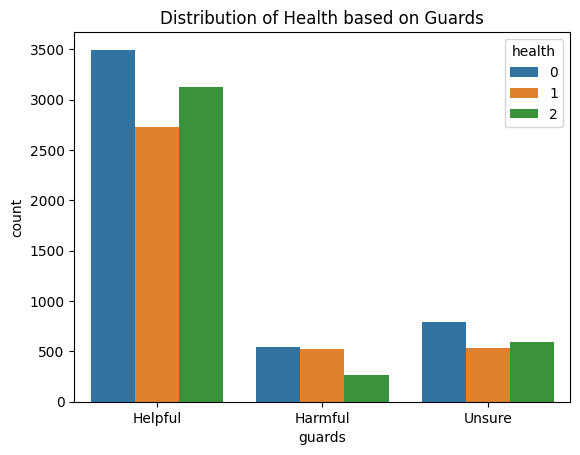

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# guards に基づく health の分布を棒グラフで表示
sns.countplot(x='guards', hue='health', data=train)
plt.title("Distribution of Health based on Guards")
plt.show()


# 4. 前処理 'guards'

In [19]:
# 'guards' 列のユニークな値を test データセットで取得
unique_values_guards_test = test['guards'].unique()

# ユニークな値の表示
print("Unique values in 'guards' in the test dataset:", unique_values_guards_test)


Unique values in 'guards' in the test dataset: [nan 'Unsure' 'Helpful' 'Harmful']


Unique values in 'guards' after transformation: ['Unknown' 'Unsure' 'Helpful' 'Harmful']


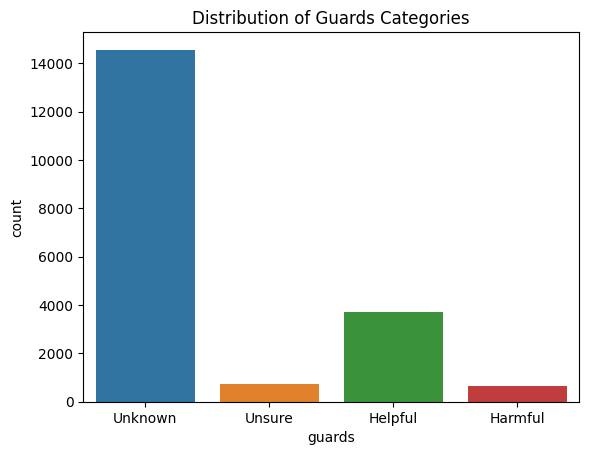

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'guards' 列の nan 値を 'Unknown' に置き換え
test['guards'] = test['guards'].fillna('Unknown')

# ユニークな値の表示（変換後）
print("Unique values in 'guards' after transformation:", test['guards'].unique())

# guards に基づくグラフの表示
sns.countplot(x='guards', data=test)
plt.title("Distribution of Guards Categories")
plt.show()


#4. 前処理を行う

In [21]:
train.isnull().sum()

created_at        0
tree_dbh          0
curb_loc          0
health            0
steward       35896
guards        34657
sidewalk          0
user_type         0
problems      28373
spc_common        0
spc_latin         0
nta               0
nta_name          0
borocode          0
boro_ct           0
boroname          0
zip_city          0
cb_num            0
st_senate         0
st_assem          0
cncldist          0
dtype: int64

In [22]:
train['steward'].value_counts()

1or2       8240
3or4       3008
4orMore     109
Name: steward, dtype: int64

In [23]:
train['guards'].value_counts()

Helpful    9347
Unsure     1923
Harmful    1326
Name: guards, dtype: int64

In [24]:
train['problems'].value_counts()

Stones                                      4987
BranchLights                                2603
StonesBranchLights                          1914
BranchOther                                  828
RootOther                                    711
                                            ... 
StonesSneakers                                20
RootOtherWiresRopeTrunkOtherBranchLights      19
RootOtherBranchLightsBranchOther              17
StonesRootOtherWiresRopeBranchOther           16
WiresRopeTrunkLightsBranchLights               7
Name: problems, Length: 73, dtype: int64

In [25]:
# train と test データセットの列名を表示
print("Columns in train dataset:", train.columns)
print("Columns in test dataset:", test.columns)

Columns in train dataset: Index(['created_at', 'tree_dbh', 'curb_loc', 'health', 'steward', 'guards',
       'sidewalk', 'user_type', 'problems', 'spc_common', 'spc_latin', 'nta',
       'nta_name', 'borocode', 'boro_ct', 'boroname', 'zip_city', 'cb_num',
       'st_senate', 'st_assem', 'cncldist'],
      dtype='object')
Columns in test dataset: Index(['created_at', 'tree_dbh', 'curb_loc', 'steward', 'guards', 'sidewalk',
       'user_type', 'problems', 'spc_common', 'spc_latin', 'nta', 'nta_name',
       'borocode', 'boro_ct', 'boroname', 'zip_city', 'cb_num', 'st_senate',
       'st_assem', 'cncldist'],
      dtype='object')


In [26]:
train.fillna('NULL', inplace=True)

In [27]:
train['problems'].nunique()

74

# 4. 前処理Problems(木に関連する問題)

In [28]:
'''
#　2値に変換
train['bool_problems'] = train['problems'].apply(lambda x: 0 if x=='NULL' else 1)
test['bool_problems'] = test['problems'].apply(lambda x: 0 if x=='NULL' else 1)
'''
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ラベルエンコーダーの初期化
label_encoder = LabelEncoder()

# `NULL` 文字列と NaN 値を 0 に置き換える
train['problems'].replace('NULL', 0, inplace=True)
train['problems'].fillna(0, inplace=True)
test['problems'].replace('NULL', 0, inplace=True)
test['problems'].fillna(0, inplace=True)

In [29]:
# 'problems' 列が 0 でない場合のみエンコーディングを適用
train_non_null = train[train['problems'] != 0]
train.loc[train['problems'] != 0, 'problems_encoded'] = label_encoder.fit_transform(train_non_null['problems']) + 1
train.loc[train['problems'] == 0, 'problems_encoded'] = 0

# 同様にテストデータセットに対しても適用
test_non_null = test[test['problems'] != 0]
test.loc[test['problems'] != 0, 'problems_encoded'] = label_encoder.transform(test_non_null['problems']) + 1
test.loc[test['problems'] == 0, 'problems_encoded'] = 0

# エンコードされた列の最初のいくつかの値を表示
print(train[['problems', 'problems_encoded']].head())
print(test[['problems', 'problems_encoded']].head())

       problems  problems_encoded
0             0               0.0
1             0               0.0
4        Stones              28.0
5             0               0.0
6  BranchLights               1.0
      problems  problems_encoded
19984        0               0.0
19985        0               0.0
19986        0               0.0
19987        0               0.0
19988   Stones              28.0


In [30]:
# train と test データセットの列名を表示
print("Columns in train dataset:", train.columns)
print("Columns in test dataset:", test.columns)

Columns in train dataset: Index(['created_at', 'tree_dbh', 'curb_loc', 'health', 'steward', 'guards',
       'sidewalk', 'user_type', 'problems', 'spc_common', 'spc_latin', 'nta',
       'nta_name', 'borocode', 'boro_ct', 'boroname', 'zip_city', 'cb_num',
       'st_senate', 'st_assem', 'cncldist', 'problems_encoded'],
      dtype='object')
Columns in test dataset: Index(['created_at', 'tree_dbh', 'curb_loc', 'steward', 'guards', 'sidewalk',
       'user_type', 'problems', 'spc_common', 'spc_latin', 'nta', 'nta_name',
       'borocode', 'boro_ct', 'boroname', 'zip_city', 'cb_num', 'st_senate',
       'st_assem', 'cncldist', 'problems_encoded'],
      dtype='object')


In [31]:
"""
# Displaying unique values in 'bool_problems'
unique_values_train = train['bool_problems'].unique()
unique_values_test = test['bool_problems'].unique()

print("Unique values in train['bool_problems']:", unique_values_train)
print("Unique values in test['bool_problems']:", unique_values_test)

"""

'\n# Displaying unique values in \'bool_problems\'\nunique_values_train = train[\'bool_problems\'].unique()\nunique_values_test = test[\'bool_problems\'].unique()\n\nprint("Unique values in train[\'bool_problems\']:", unique_values_train)\nprint("Unique values in test[\'bool_problems\']:", unique_values_test)\n\n'

# 4. 前処理 'steward' : 木の管理者


In [32]:
# 'steward' 列に存在するユニークな値を表示する
unique_steward_values = train['steward'].unique()
print(unique_steward_values)

['NULL' '3or4' '1or2' '4orMore']


In [33]:
def convert_steward(value):
    if value == 'NULL':
        return 0
    elif value == '1or2':
        return 1.5
    elif value == '3or4':
        return 3.5
    elif value == '4orMore':
        return 5
    else:
        return None  # 予期しない値の場合

train['steward'] = train['steward'].apply(convert_steward)
test['steward'] = test['steward'].apply(convert_steward)


In [34]:
# 'steward' 列に存在するユニークな値を表示する
unique_steward_values = train['steward'].unique()
print(unique_steward_values)

[0.  3.5 1.5 5. ]


# 4. 前処理 spc_common(str, 木の種類)

In [35]:
# 欠損値
# `spc_common_encoded` 列の欠損値の数をカウント
missing_values_count = train['spc_common'].isnull().sum()

print(f"'spc_common' 列の欠損値の数: {missing_values_count}")



'spc_common' 列の欠損値の数: 0


In [36]:
test_missing_values_count = test['spc_common'].isnull().sum()

print(f"'spc_common' 列の欠損値の数: {test_missing_values_count}")

'spc_common' 列の欠損値の数: 0


In [37]:
from sklearn.preprocessing import LabelEncoder

# ラベルエンコーダーの初期化
label_encoder = LabelEncoder()
# エンコードされた列の最初のいくつかの値を表示
print(train['spc_common'].head())


0           English oak
1    crimson king maple
4      London planetree
5        Amur cork tree
6     littleleaf linden
Name: spc_common, dtype: object


In [38]:
from sklearn.preprocessing import LabelEncoder

# ラベルエンコーダーの初期化
label_encoder = LabelEncoder()

# `spc_common` 列のエンコード
train['spc_common_encoded'] = label_encoder.fit_transform(train['spc_common'])

# 元の列とエンコードされた列の最初のいくつかの値を表示
print(train[['spc_common', 'spc_common_encoded']].head())


           spc_common  spc_common_encoded
0         English oak                  17
1  crimson king maple                  56
4    London planetree                  28
5      Amur cork tree                   6
6   littleleaf linden                  77


In [39]:
# `test` データセットの `spc_common` 列を同じエンコーダーを使用してエンコード
test['spc_common_encoded'] = label_encoder.transform(test['spc_common'])

# `test` データセットの変換後の値を表示
print(test[['spc_common', 'spc_common_encoded']].head())


              spc_common  spc_common_encoded
19984       Callery pear                  11
19985             cherry                  51
19986  littleleaf linden                  77
19987       dawn redwood                  58
19988   purple-leaf plum                  90


# 5. 前処理2 curb_loc(ツリーが路上にあるかどうか)の前処理 _encodedの登場


In [40]:
# ワンホットエンコーディングの適用
train_encoded = pd.get_dummies(train, columns=['curb_loc'])
test_encoded = pd.get_dummies(test, columns=['curb_loc'])

# 変換後のデータセットの先頭数行を表示（確認用）
print(train_encoded.head())
print(test_encoded.head())


   created_at  tree_dbh  health  steward   guards  sidewalk  user_type  \
0  2015-06-29        14       1      0.0     NULL    Damage  Volunteer   
1  2016-09-21         5       1      3.5  Helpful  NoDamage  Volunteer   
4  2016-06-24        23       1      0.0     NULL  NoDamage  Volunteer   
5  2015-08-11        12       1      0.0     NULL    Damage  Volunteer   
6  2015-10-24         8       1      0.0  Helpful    Damage  Volunteer   

       problems          spc_common                        spc_latin  ...  \
0             0         English oak                    Quercus robur  ...   
1             0  crimson king maple  Acer platanoides 'Crimson King'  ...   
4        Stones    London planetree            Platanus x acerifolia  ...   
5             0      Amur cork tree           Phellodendron amurense  ...   
6  BranchLights   littleleaf linden                    Tilia cordata  ...   

    boroname     zip_city  cb_num  st_senate st_assem cncldist  \
0     Queens  Little Neck 

## curb_locが追加

In [41]:
print("Columns in train dataset:", train_encoded.columns)
print("Columns in test dataset:", test_encoded.columns)

Columns in train dataset: Index(['created_at', 'tree_dbh', 'health', 'steward', 'guards', 'sidewalk',
       'user_type', 'problems', 'spc_common', 'spc_latin', 'nta', 'nta_name',
       'borocode', 'boro_ct', 'boroname', 'zip_city', 'cb_num', 'st_senate',
       'st_assem', 'cncldist', 'problems_encoded', 'spc_common_encoded',
       'curb_loc_OffsetFromCurb', 'curb_loc_OnCurb'],
      dtype='object')
Columns in test dataset: Index(['created_at', 'tree_dbh', 'steward', 'guards', 'sidewalk', 'user_type',
       'problems', 'spc_common', 'spc_latin', 'nta', 'nta_name', 'borocode',
       'boro_ct', 'boroname', 'zip_city', 'cb_num', 'st_senate', 'st_assem',
       'cncldist', 'problems_encoded', 'spc_common_encoded',
       'curb_loc_OffsetFromCurb', 'curb_loc_OnCurb'],
      dtype='object')


#6.2 spc_commonの前処理

In [42]:
"""
import pandas as pd

# train データセットにワンホットエンコーディングを適用
train_encoded = pd.get_dummies(train_encoded, columns=['spc_common'])

# 生成されたカラムを保存
train_columns = train_encoded.columns

# test データセットにワンホットエンコーディングを適用
test_encoded = pd.get_dummies(test_encoded, columns=['spc_common'])

# train データセットに存在して test データセットに存在しないカラムを追加
for col in train_columns:
    if col not in test_encoded.columns:
        test_encoded[col] = 0

# test データセットに存在して train データセットに存在しないカラムを削除
test_encoded = test_encoded[train_columns]

# 結果を表示
print(train_encoded.head())
print(test_encoded.head())

"""

"\nimport pandas as pd\n\n# train データセットにワンホットエンコーディングを適用\ntrain_encoded = pd.get_dummies(train_encoded, columns=['spc_common'])\n\n# 生成されたカラムを保存\ntrain_columns = train_encoded.columns\n\n# test データセットにワンホットエンコーディングを適用\ntest_encoded = pd.get_dummies(test_encoded, columns=['spc_common'])\n\n# train データセットに存在して test データセットに存在しないカラムを追加\nfor col in train_columns:\n    if col not in test_encoded.columns:\n        test_encoded[col] = 0\n\n# test データセットに存在して train データセットに存在しないカラムを削除\ntest_encoded = test_encoded[train_columns]\n\n# 結果を表示\nprint(train_encoded.head())\nprint(test_encoded.head())\n\n"

In [43]:
print("Columns in train dataset:", train_encoded.columns)
print("Columns in test dataset:", test_encoded.columns)

Columns in train dataset: Index(['created_at', 'tree_dbh', 'health', 'steward', 'guards', 'sidewalk',
       'user_type', 'problems', 'spc_common', 'spc_latin', 'nta', 'nta_name',
       'borocode', 'boro_ct', 'boroname', 'zip_city', 'cb_num', 'st_senate',
       'st_assem', 'cncldist', 'problems_encoded', 'spc_common_encoded',
       'curb_loc_OffsetFromCurb', 'curb_loc_OnCurb'],
      dtype='object')
Columns in test dataset: Index(['created_at', 'tree_dbh', 'steward', 'guards', 'sidewalk', 'user_type',
       'problems', 'spc_common', 'spc_latin', 'nta', 'nta_name', 'borocode',
       'boro_ct', 'boroname', 'zip_city', 'cb_num', 'st_senate', 'st_assem',
       'cncldist', 'problems_encoded', 'spc_common_encoded',
       'curb_loc_OffsetFromCurb', 'curb_loc_OnCurb'],
      dtype='object')


#6. guards欠損値を変更


In [44]:
train_encoded['guards'] = train_encoded['guards'].replace('NULL', 'Unsure')


In [45]:
train_encoded = pd.get_dummies(train_encoded, columns=['guards'])


# 6. User Type


In [46]:
# 'user_type' カラムのユニークな値を表示
unique_user_types = train['user_type'].unique()
print(unique_user_types)

# 'user_type' カラムのユニークな値の数を表示
unique_user_types_count = train['user_type'].nunique()
print("ユニークな user_type の種類の数:", unique_user_types_count)


# ワンホットエンコーディングの適用
train_encoded = pd.get_dummies(train_encoded, columns=['user_type'])
test_encoded = pd.get_dummies(test_encoded, columns=['user_type'])



# 変換後のデータセットの先頭数行を表示（確認用）
print(train_encoded.head())
print(test_encoded.head())

['Volunteer' 'TreesCount Staff' 'NYC Parks Staff']
ユニークな user_type の種類の数: 3
   created_at  tree_dbh  health  steward  sidewalk      problems  \
0  2015-06-29        14       1      0.0    Damage             0   
1  2016-09-21         5       1      3.5  NoDamage             0   
4  2016-06-24        23       1      0.0  NoDamage        Stones   
5  2015-08-11        12       1      0.0    Damage             0   
6  2015-10-24         8       1      0.0    Damage  BranchLights   

           spc_common                        spc_latin   nta  \
0         English oak                    Quercus robur  QN45   
1  crimson king maple  Acer platanoides 'Crimson King'  BX05   
4    London planetree            Platanus x acerifolia  MN03   
5      Amur cork tree           Phellodendron amurense  QN22   
6   littleleaf linden                    Tilia cordata  QN22   

                               nta_name  ...  problems_encoded  \
0  Douglas Manor-Douglaston-Little Neck  ...               0.0  

# 6. sidewalk

In [47]:
import pandas as pd
# 'sidewalk' カラムのユニークな値を表示
unique_values = train['sidewalk'].unique()
print("ユニークな値:", unique_values)

# 'sidewalk' カラムのユニークな値の数を表示
unique_values_count = train['sidewalk'].nunique()
print("ユニークな値の数:", unique_values_count)



# ワンホットエンコーディングの適用
train_encoded = pd.get_dummies(train_encoded, columns=['sidewalk'])
test_encoded = pd.get_dummies(test_encoded, columns=['sidewalk'])


# 結果の表示
print(train_encoded.head())


ユニークな値: ['Damage' 'NoDamage']
ユニークな値の数: 2
   created_at  tree_dbh  health  steward      problems          spc_common  \
0  2015-06-29        14       1      0.0             0         English oak   
1  2016-09-21         5       1      3.5             0  crimson king maple   
4  2016-06-24        23       1      0.0        Stones    London planetree   
5  2015-08-11        12       1      0.0             0      Amur cork tree   
6  2015-10-24         8       1      0.0  BranchLights   littleleaf linden   

                         spc_latin   nta  \
0                    Quercus robur  QN45   
1  Acer platanoides 'Crimson King'  BX05   
4            Platanus x acerifolia  MN03   
5           Phellodendron amurense  QN22   
6                    Tilia cordata  QN22   

                               nta_name  borocode  ...  \
0  Douglas Manor-Douglaston-Little Neck         4  ...   
1            Bedford Park-Fordham North         2  ...   
4     Central Harlem North-Polo Grounds         1 

#6.1 testデータ

In [48]:
test_encoded['guards'] = test_encoded['guards'].replace('NULL', 'Unsure')


In [49]:
test_encoded = pd.get_dummies(test_encoded, columns=['guards'])


In [50]:
# gurds_Harmful, guards_Helpful, guards_Unsureが追加
# train と test データセットの列名を表示
print("Columns in train dataset:", train_encoded.columns)
print("Columns in test dataset:", test_encoded.columns)

Columns in train dataset: Index(['created_at', 'tree_dbh', 'health', 'steward', 'problems', 'spc_common',
       'spc_latin', 'nta', 'nta_name', 'borocode', 'boro_ct', 'boroname',
       'zip_city', 'cb_num', 'st_senate', 'st_assem', 'cncldist',
       'problems_encoded', 'spc_common_encoded', 'curb_loc_OffsetFromCurb',
       'curb_loc_OnCurb', 'guards_Harmful', 'guards_Helpful', 'guards_Unsure',
       'user_type_NYC Parks Staff', 'user_type_TreesCount Staff',
       'user_type_Volunteer', 'sidewalk_Damage', 'sidewalk_NoDamage'],
      dtype='object')
Columns in test dataset: Index(['created_at', 'tree_dbh', 'steward', 'problems', 'spc_common',
       'spc_latin', 'nta', 'nta_name', 'borocode', 'boro_ct', 'boroname',
       'zip_city', 'cb_num', 'st_senate', 'st_assem', 'cncldist',
       'problems_encoded', 'spc_common_encoded', 'curb_loc_OffsetFromCurb',
       'curb_loc_OnCurb', 'user_type_NYC Parks Staff',
       'user_type_TreesCount Staff', 'user_type_Volunteer', 'sidewalk_Dama

#7. モデリングをしてみよう

In [51]:
test_encoded.fillna('NULL', inplace=True)
# test['bool_problems'] = test['problems'].apply(lambda x: 0 if x=='NULL' else 1)

In [52]:
train_encoded.shape

(47253, 29)

In [53]:
# test_size
# from sklearn.model_selection import train_test_split
# train_encoded, valid = train_test_split(train_encoded, test_size=0.2, stratify=train['health'], random_state=82) # stratifyを設定することで目的変数の分布を保ったまま分割することができます。



In [54]:
# 分割後のデータセットのクラス分布を確認
# print("トレーニングセットのクラス分布:\n", train_encoded['health'].value_counts())
# print("検証セットのクラス分布:\n", valid['health'].value_counts())

In [55]:
# train_encoded.shape

In [56]:
# valid.shape

In [57]:
# カラムの数
column_count = len(train_encoded.columns)
print("Number of columns in the dataset:", column_count)


Number of columns in the dataset: 29


In [58]:
# 使用する特徴量の選択
# select_cols = ['tree_dbh', 'curb_loc', 'sidewalk', 'steward', 'guards', 'user_type', 'bool_problems']
# 0.3309583
# select_cols = ['tree_dbh', 'curb_loc', 'sidewalk', 'steward', 'guards', 'user_type', 'bool_problems', 'spc_common']

# 0.31516125898212494

# 0.345
select_cols = ['tree_dbh',
              'curb_loc_OffsetFromCurb', 'curb_loc_OnCurb',
              'sidewalk_Damage', 'sidewalk_NoDamage',
              'steward',
              'boro_ct',
              'borocode',
              'cb_num',
              'st_senate',
              'st_assem',
              'cncldist',
              'guards_Harmful', 'guards_Helpful', 'guards_Unsure',
              'user_type_Volunteer','user_type_NYC Parks Staff', 'user_type_TreesCount Staff',
              'problems_encoded',
              'spc_common_encoded']

# 欠損値
missing_values = train_encoded[select_cols].isnull().sum()

print(missing_values)

# 目的変数とそれ以外に学習用データを分割
x_train = train_encoded[select_cols]
y_train = train_encoded['health']
# x_valid = valid[select_cols]
# y_valid = valid['health']


# カテゴリのままでは学習できないのでワンホットエンコーディングで数値化
x_train = pd.get_dummies(x_train)
# x_valid = pd.get_dummies(x_valid)
test = pd.get_dummies(test_encoded[select_cols])


tree_dbh                      0
curb_loc_OffsetFromCurb       0
curb_loc_OnCurb               0
sidewalk_Damage               0
sidewalk_NoDamage             0
steward                       0
boro_ct                       0
borocode                      0
cb_num                        0
st_senate                     0
st_assem                      0
cncldist                      0
guards_Harmful                0
guards_Helpful                0
guards_Unsure                 0
user_type_Volunteer           0
user_type_NYC Parks Staff     0
user_type_TreesCount Staff    0
problems_encoded              0
spc_common_encoded            0
dtype: int64


In [59]:
# このあたりでデータが変わってる
# train と test データセットの列名を表示
print("Columns in train dataset:", train_encoded.columns)
print("Columns in test dataset:", test_encoded.columns)

Columns in train dataset: Index(['created_at', 'tree_dbh', 'health', 'steward', 'problems', 'spc_common',
       'spc_latin', 'nta', 'nta_name', 'borocode', 'boro_ct', 'boroname',
       'zip_city', 'cb_num', 'st_senate', 'st_assem', 'cncldist',
       'problems_encoded', 'spc_common_encoded', 'curb_loc_OffsetFromCurb',
       'curb_loc_OnCurb', 'guards_Harmful', 'guards_Helpful', 'guards_Unsure',
       'user_type_NYC Parks Staff', 'user_type_TreesCount Staff',
       'user_type_Volunteer', 'sidewalk_Damage', 'sidewalk_NoDamage'],
      dtype='object')
Columns in test dataset: Index(['created_at', 'tree_dbh', 'steward', 'problems', 'spc_common',
       'spc_latin', 'nta', 'nta_name', 'borocode', 'boro_ct', 'boroname',
       'zip_city', 'cb_num', 'st_senate', 'st_assem', 'cncldist',
       'problems_encoded', 'spc_common_encoded', 'curb_loc_OffsetFromCurb',
       'curb_loc_OnCurb', 'user_type_NYC Parks Staff',
       'user_type_TreesCount Staff', 'user_type_Volunteer', 'sidewalk_Dama

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

# モデルの初期化
model = RandomForestClassifier(random_state=82)

# ハイパーパラメータの範囲を設定
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# グリッドサーチとクロスバリデーションの実施
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(x_train, y_train)

# 最適なパラメータとスコアの表示
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score (F1 Macro): {grid_search.best_score_}")

# 最適なパラメータでモデルを再訓練
best_model = grid_search.best_estimator_


In [ ]:

# valid_predictions = model.predict(x_valid)

# valid_f1 = f1_score(y_valid, valid_predictions, average='macro')

# print(f"Validation F1 Score (Macro): {valid_f1}")

# Prepare the test dataset
# Get the list of features used in the training dataset

# 最適なモデルで再訓練
# model = RandomForestClassifier(random_state=82)
model.fit(x_train, y_train)

train_features = x_train.columns

# Add missing features to the test dataset
for feature in train_features:
    if feature not in test.columns:
        test[feature] = 0

# Reorder the features in the test dataset to match the training dataset
test = test[train_features]

# Make predictions on the test set using the best model
test_predictions = best_model.predict(test)


# Save predictions to a CSV file
# Assuming you have defined sample_submit
sample_submit[1] = test_predictions  # Use test_predictions for the test set
sample_submit.to_csv('/content/drive/MyDrive/SMFG/2023_1230_1850_submit.csv', index=True, header=None)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score

# Assuming you have defined x_train, y_train, x_valid, y_valid

"""
# Define the model
model = RandomForestClassifier()


# Define an expanded hyperparameter grid for tuning
expanded_param_grid = {
    'n_estimators': [50, 100, 200, 300],  # More options for the number of trees
    'max_depth': [None, 10, 20, 30, 40],   # Including deeper trees
    'min_samples_split': [2, 5, 10, 15, 20],   # A wider range for the minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8],       # More options for the minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Different options for the number of features to consider when looking for the best split
    'bootstrap': [True, False]                 # Whether bootstrap samples are used when building trees
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use this expanded grid in GridSearchCV
grid_search = GridSearchCV(model, expanded_param_grid, cv=cv, scoring='f1_macro')
grid_search.fit(x_train, y_train)


# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the validation set
valid_predictions = best_model.predict(x_valid)

# Calculate F1 score
valid_f1 = f1_score(y_valid, valid_predictions, average='macro')

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Validation F1 Score (Macro): {valid_f1}")



# Prepare the test dataset
# Get the list of features used in the training dataset
train_features = x_train.columns

# Add missing features to the test dataset
for feature in train_features:
    if feature not in test.columns:
        test[feature] = 0

# Reorder the features in the test dataset to match the training dataset
test = test[train_features]

# Make predictions on the test set using the best model
test_predictions = best_model.predict(test)

# Save predictions to a CSV file
# Assuming you have defined sample_submit
sample_submit[1] = test_predictions  # Use test_predictions for the test set
sample_submit.to_csv('/content/drive/MyDrive/SMFG/2023_1230_1700_submit.csv', index=True, header=None)
"""



In [ ]:

# Save predictions to a CSV file
# submission_df = pd.DataFrame({'pred': test_predictions})
# submission_df.to_csv('/content/drive/MyDrive/SMFG/2023_2400_submit.csv', index=False, header=None)


In [ ]:
"""
# 訓練データセットで使用された特徴のリストを取得
train_features = x_train.columns

# テストデータセットに不足している特徴を追加
for feature in train_features:
    if feature not in test.columns:
        test[feature] = 0

# テストデータセットの特徴を訓練データセットと同じ順序に並べ替え
test = test[train_features]

# モデルを使用して予測を行う
pred = model.predict(test)
print(pred[:5])

"""
